In [30]:
from tokenize import tokenize
from torch import nn
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Feedforward

In [3]:
class FeedForward(nn.Module):
    def __init__(self, embed_dim, factor=2):
        super(FeedForward, self).__init__()
        self.feed_forward = nn.Sequential(
            nn.Linear(embed_dim, factor*embed_dim),
            nn.ReLU(),
            nn.Linear(factor*embed_dim, embed_dim)
        )  
    
    def forward(self, x):
        return self.feed_forward(x)

In [4]:
X = torch.rand(64, 100, 256)

In [7]:
ff = FeedForward(256, 2)
Y = ff(X)
Y.size()

torch.Size([64, 100, 256])

In [5]:
Y.size()

torch.Size([64, 100, 256])

# Normalization

A key challenge in training neural networks is the instability caused by the distribution of each layer's inputs changing as the parameters of the previous layers change, a problem known as "internal covariate shift." This can lead to slow training convergence and necessitates lower learning rates and careful parameter initialization. Another issue is that traditional methods like Batch Normalization, which aims to address this problem, depend heavily on the size of the mini-batch and struggle with Recurrent Neural Networks (RNNs) and online learning tasks.

Internal covariate shift refers to the phenomenon in neural networks where the distribution of each layer’s inputs changes during training, as the parameters of the previous layers change. This shift in the distribution can cause issues for the training process for several reasons:

1.Learning Rate Challenges: Because the distribution of inputs is changing, the optimal learning rate for one layer might not be optimal for another. If the learning rate is too high for the changed distribution, it can lead to divergence; if it's too low, it can slow down the training process.

2.Training Instability: When the input distribution to a layer changes, the layer may continually adapt to new distributions. This can lead to instability, where the network never truly converges, as it's always trying to catch up to the moving target of a shifting input distribution.

3.Vanishing/Exploding Gradients: The change in distributions can exacerbate the problems of vanishing and exploding gradients, particularly in deep networks. If the input distribution to a layer has a high variance, it can lead to large gradients and possibly exploding gradient issues. Conversely, a distribution with a small variance can lead to vanishing gradients, where updates to the model become imperceptibly small.

Batch Normalization was one of the first techniques proposed to mitigate internal covariate shift by normalizing the inputs to each layer so they have a mean of zero and a standard deviation of one. This normalization is intended to stabilize the distribution of inputs to a layer throughout training. Layer Normalization builds upon this concept by normalizing across all the features in a layer, rather than normalizing across the batch dimension as Batch Normalization does.

In [8]:
layer_norm = nn.LayerNorm(256)
Y = layer_norm(X)

In [16]:
print(torch.min(Y))
print(torch.max(Y))
print(torch.mean(Y))
print(torch.std(Y))

tensor(-2.0145, grad_fn=<MinBackward1>)
tensor(2.0260, grad_fn=<MaxBackward1>)
tensor(2.4214e-09, grad_fn=<MeanBackward0>)
tensor(0.9999, grad_fn=<StdBackward0>)


In [17]:
print(torch.min(X))
print(torch.max(X))
print(torch.mean(X))
print(torch.std(X))

tensor(4.7684e-07)
tensor(1.0000)
tensor(0.5003)
tensor(0.2888)


In [71]:
hist = torch.histogram(X, bins=30)
df = pd.DataFrame({'x': hist.bin_edges[:-1].detach().numpy(), 'value':hist.hist.detach().numpy()})
df

,x,value
0,4.768372e-07,54672.0
1,3.333374e-02,54771.0
2,6.666701e-02,54409.0
3,1.000003e-01,54668.0
4,1.333335e-01,54703.0
5,1.666668e-01,54450.0
6,2.000001e-01,54745.0
7,2.333333e-01,54365.0
8,2.666666e-01,54595.0
9,2.999999e-01,54576.0


<Axes: xlabel='x', ylabel='value'>

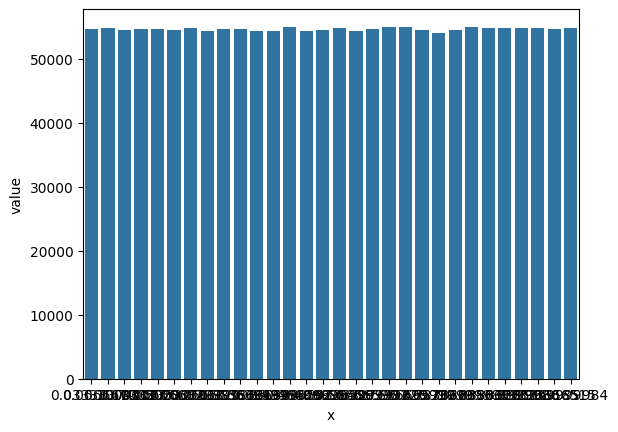

In [66]:
sns.barplot(df, x="x", y="value")


In [69]:
hist = torch.histogram(Y, bins=30)
df = pd.DataFrame({'x': hist.bin_edges[:-1].detach().numpy(), 'value':hist.hist.detach().numpy()})
df

,x,value
0,-2.014459,491.0
1,-1.879778,10054.0
2,-1.745096,44429.0
3,-1.610415,63772.0
4,-1.475733,64347.0
5,-1.341052,64217.0
6,-1.206370,64319.0
7,-1.071688,63892.0
8,-0.937007,63901.0
9,-0.802325,64101.0


<Axes: xlabel='x', ylabel='value'>

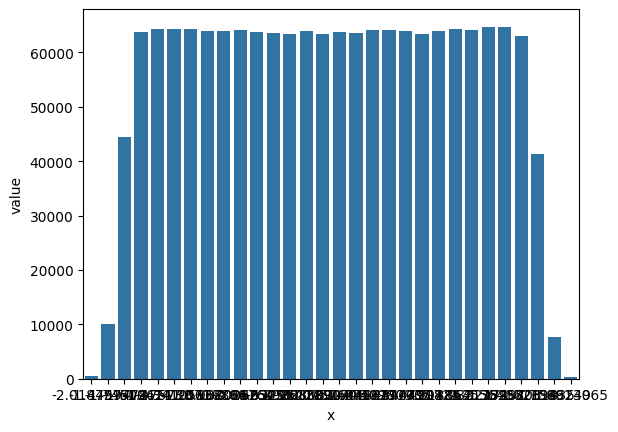

In [70]:
sns.barplot(df, x="x", y="value")


In [81]:
X_flatten = X.view(X.size(0)*X.size(1)*X.size(2))
print(X_flatten.size())

torch.Size([1638400])


<Axes: ylabel='Count'>

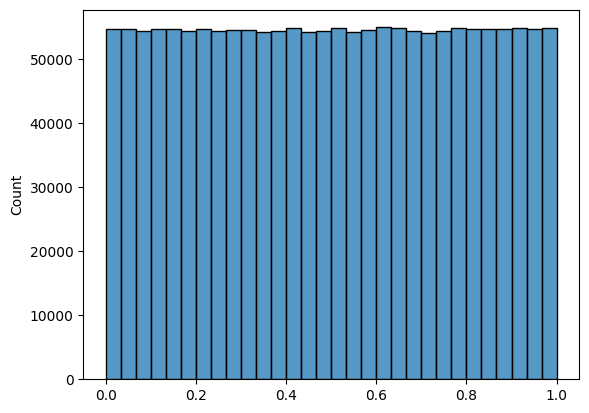

In [84]:
sns.histplot(X_flatten, bins=30)

In [88]:
layer_norm = nn.LayerNorm(256)
Y = layer_norm(X)
Y_flatten = Y.view(Y.size(0)*Y.size(1)*Y.size(2))

<Axes: ylabel='Count'>

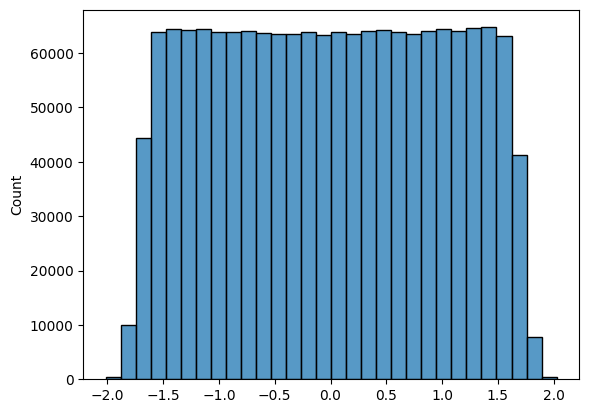

In [90]:
sns.histplot(Y_flatten.detach().numpy(), bins=30)